# **Customer Segmentation - K-Means Clustering Exploration with different distances metrics and activation function**

In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt

### Importing Dataset

In [61]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking For null values

In [62]:
data.isnull().value_counts()

CustomerID  Gender  Age    Annual Income (k$)  Spending Score (1-100)
False       False   False  False               False                     200
Name: count, dtype: int64

### Encoding The Gender column with label encoder

In [63]:
le=LabelEncoder()

In [64]:
data['Gender']=le.fit_transform(data['Gender'])

### Scaling the dataset with standard scaler and saving it with droping Customer ID column as it is irrelevant for now

In [65]:
sc = StandardScaler()
customer_data_scaled = sc.fit_transform(data.drop('CustomerID', axis=1))

### Making an Elbow plot to get the optimal number of Clusters with both initialization methods (Kmeans++ and random)

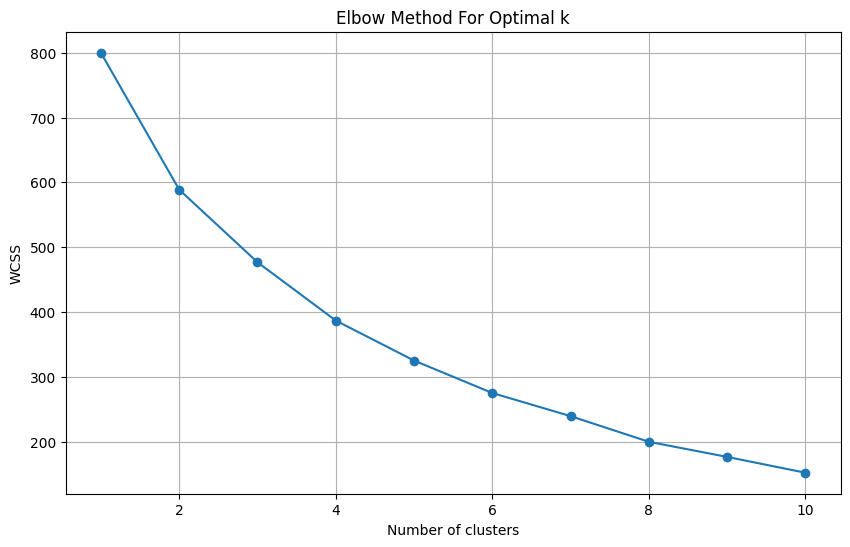

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
optimal_clusters = np.argmin(np.diff(np.diff(wcss)))+1


In [67]:
print(optimal_clusters)

6


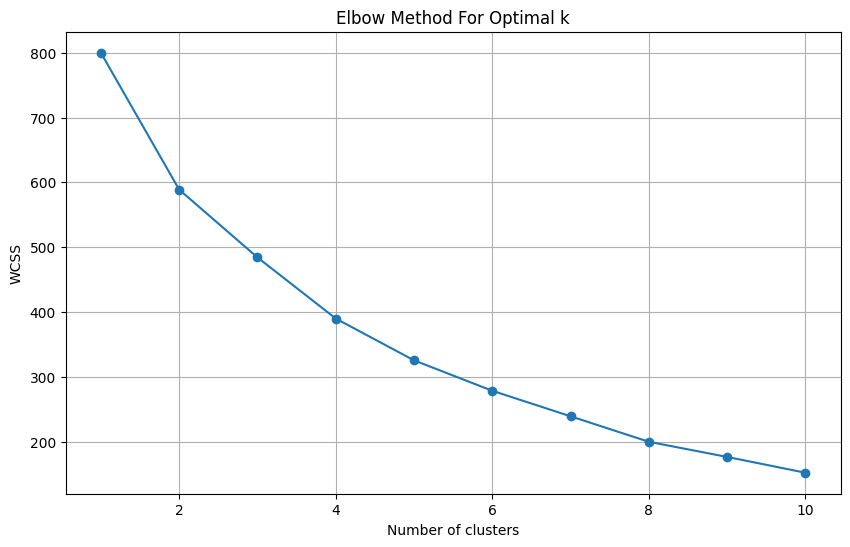

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
optimal_clusters = np.argmin(np.diff(np.diff(wcss)))+1

In [69]:
print(optimal_clusters)

8


### Making Clusters using initialization Methods (Kmeans++ and random) and using distance metrics (Euclidean, Manhattan, cosine similarity)

In [70]:
num_clusters = 6
num_init = 10
max_iter = 300
n_init_kmeanspp = 10

In [71]:
kmeans_euclidean1 = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_euclidean1.fit(customer_data_scaled)


KMeans(n_clusters=6, n_init=10, random_state=42)

In [72]:
kmeans_euclidean2 = KMeans(n_clusters=num_clusters, init='random', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_euclidean2.fit(customer_data_scaled)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

for manhatan distance the data is scaled with mean and standard deviation set to Flase. This means that the scaler will not center the data by subtracting the mean or scale it by dividing by the standard deviation.

In [73]:
scm = StandardScaler(with_mean=False, with_std=False)
customer_data_scaled_manhattan = scm.fit_transform(data)

In [74]:
kmeans_manhattan1 = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_manhattan1.fit(customer_data_scaled_manhattan)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [75]:
kmeans_manhattan2 = KMeans(n_clusters=num_clusters, init='random', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_manhattan2.fit(customer_data_scaled_manhattan)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

the MiniBatchKMeans model to the dataset using the cosine distance. The MiniBatchKMeans algorithm will cluster the data into num_clusters clusters based on the cosine distance.

In [76]:
from sklearn.cluster import MiniBatchKMeans

In [77]:
kmeans_cosine1 = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', batch_size=100, n_init=n_init_kmeanspp, random_state=42)
kmeans_cosine1.fit(data)

MiniBatchKMeans(batch_size=100, n_clusters=6, n_init=10, random_state=42)

In [78]:
kmeans_cosine2 = MiniBatchKMeans(n_clusters=num_clusters, init='random', batch_size=100, n_init=n_init_kmeanspp, random_state=42)
kmeans_cosine2.fit(data)

MiniBatchKMeans(batch_size=100, init='random', n_clusters=6, n_init=10,
                random_state=42)

### The silhouette score is a metric used to evaluate the quality of clustering results. It is a value between -1 and 1, where a higher value indicates that the data points in a cluster are more similar to each other and less similar to data points in other clusters.

In [79]:
sil_euclidean1 = silhouette_score(customer_data_scaled, kmeans_euclidean1.labels_)
sil_euclidean2 = silhouette_score(customer_data_scaled, kmeans_euclidean2.labels_)
sil_manhattan1 = silhouette_score(customer_data_scaled_manhattan, kmeans_manhattan1.labels_, metric='manhattan')
sil_manhattan2 = silhouette_score(customer_data_scaled_manhattan, kmeans_manhattan2.labels_, metric='manhattan')
sil_cosine1 = silhouette_score(data, kmeans_cosine1.labels_, metric='cosine')
sil_cosine2 = silhouette_score(data, kmeans_cosine2.labels_, metric='cosine')

### The Calinski-Harabasz index is used to evaluate the quality of clustering algorithms by comparing the between-cluster separation and the within-cluster compactness. A higher Calinski-Harabasz index indicates that the clusters are well-separated and compact, which is desirable. The index can be used to compare the performance of different clustering algorithms or to determine the optimal number of clusters for a given dataset. The range of the Calinski-Harabasz index is not fixed, and it depends on the dataset and the number of clusters.

In [80]:
cal_euclidean1 = calinski_harabasz_score(customer_data_scaled, kmeans_euclidean1.labels_)
cal_euclidean2 = calinski_harabasz_score(customer_data_scaled, kmeans_euclidean2.labels_)
cal_manhattan1 = calinski_harabasz_score(customer_data_scaled_manhattan, kmeans_manhattan1.labels_)
cal_manhattan2 = calinski_harabasz_score(customer_data_scaled_manhattan, kmeans_manhattan2.labels_)
cal_cosine1 = calinski_harabasz_score(data, kmeans_cosine1.labels_)
cal_cosine2 = calinski_harabasz_score(data, kmeans_cosine2.labels_)

## Results of above processes:

In [81]:
print(f"Silhouette score for Euclidean distance with kmeans++: {sil_euclidean1}")
print(f"Silhouette score for Euclidean distance with random: {sil_euclidean2}")
print(f"Silhouette score for Manhattan distance with kmeans++: {sil_manhattan1}")
print(f"Silhouette score for Manhattan distance with random: {sil_manhattan2}")
print(f"Silhouette score for Cosine similarity with kmeans++: {sil_cosine1}")
print(f"Silhouette score for Cosine similarity with random: {sil_cosine2}")


Silhouette score for Euclidean distance with kmeans++: 0.33107393337175933
Silhouette score for Euclidean distance with random: 0.3285472275203275
Silhouette score for Manhattan distance with kmeans++: 0.4072462685381771
Silhouette score for Manhattan distance with random: 0.4072462685381771
Silhouette score for Cosine similarity with kmeans++: 0.28793929046383004
Silhouette score for Cosine similarity with random: 0.3088243975275228


### Based on the silhouette scores, the best clustering results are obtained using the Manhattan distance metric with both k-means++ and random initialization, with a score of 0.4072462685381771. The Euclidean distance and cosine similarity perform worse, with scores below 0.35.

In [82]:
print(f"Calinski-Harabasz index for Euclidean distance kmeans++: {cal_euclidean1}")
print(f"Calinski-Harabasz index for Euclidean distance with random: {cal_euclidean2}")
print(f"Calinski-Harabasz index for Manhattan distance kmeans++: {cal_manhattan1}")
print(f"Calinski-Harabasz index for Manhattan distance with random: {cal_manhattan2}")
print(f"Calinski-Harabasz index for Cosine similarity kmeans++: {cal_cosine1}")
print(f"Calinski-Harabasz index for Cosine similarity with random: {cal_cosine2}")

Calinski-Harabasz index for Euclidean distance kmeans++: 73.49623534335936
Calinski-Harabasz index for Euclidean distance with random: 73.43079014733595
Calinski-Harabasz index for Manhattan distance kmeans++: 269.83194405750726
Calinski-Harabasz index for Manhattan distance with random: 269.83194405750726
Calinski-Harabasz index for Cosine similarity kmeans++: 245.5911018004399
Calinski-Harabasz index for Cosine similarity with random: 233.07574279942187


### The Calinski-Harabasz index also indicates that the Manhattan distance metric produces the best clustering, with much higher values compared to Euclidean distance and cosine similarity. The initialization method (k-means++ vs random) does not seem to significantly affect the Calinski-Harabasz index for a given distance metric.

### **In summary, the Manhattan distance metric appears to be the most appropriate for this dataset, producing the highest silhouette scores and Calinski-Harabasz indices. The initialization method has a smaller impact on the clustering quality.**

### PLotting The Cluster distribution of all prepared cluster to show the distribution of each cluster

In [83]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)
pca_euclidean = pca.fit_transform(customer_data_scaled)
pca_manhattan = pca.fit_transform(customer_data_scaled_manhattan)
pca_cosine = pca.fit_transform(data)

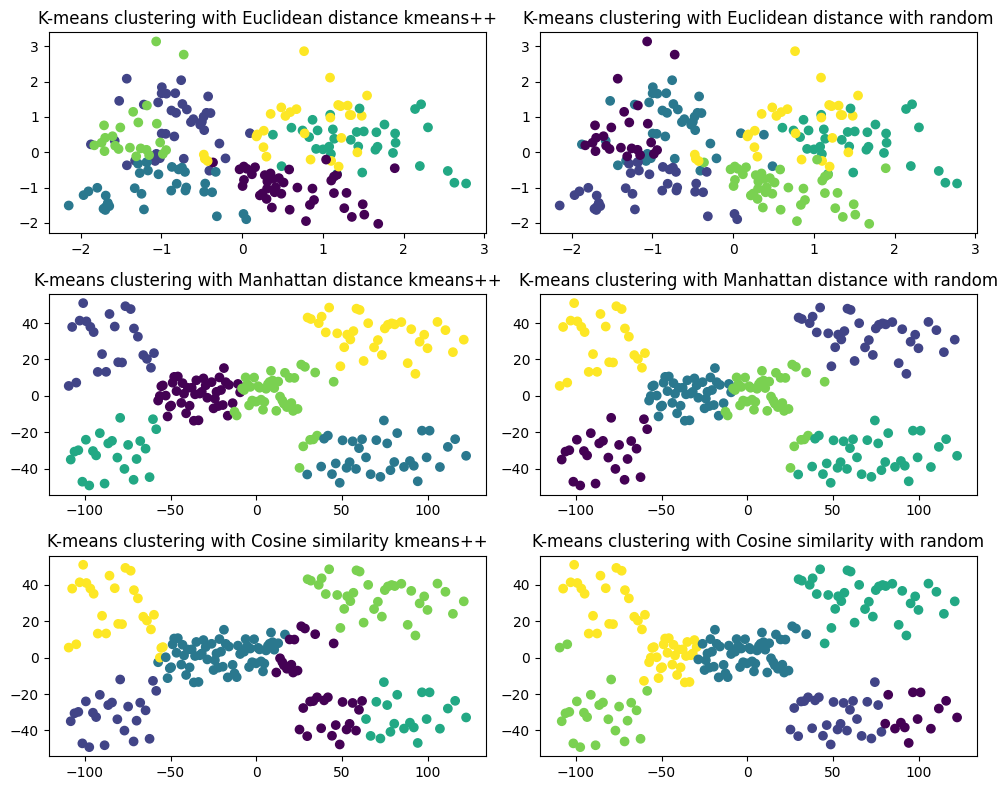

In [85]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.scatter(pca_euclidean[:, 0], pca_euclidean[:, 1], c=kmeans_euclidean1.labels_, cmap='viridis')
plt.title('K-means clustering with Euclidean distance kmeans++')
plt.subplot(3,2,2)
plt.scatter(pca_euclidean[:, 0], pca_euclidean[:, 1], c=kmeans_euclidean2.labels_, cmap='viridis')
plt.title('K-means clustering with Euclidean distance with random')

plt.subplot(3,2, 3)
plt.scatter(pca_manhattan[:, 0], pca_manhattan[:, 1], c=kmeans_manhattan1.labels_, cmap='viridis')
plt.title('K-means clustering with Manhattan distance kmeans++')
plt.subplot(3,2, 4)
plt.scatter(pca_manhattan[:, 0], pca_manhattan[:, 1], c=kmeans_manhattan2.labels_, cmap='viridis')
plt.title('K-means clustering with Manhattan distance with random')

plt.subplot( 3, 2,5)
plt.scatter(pca_cosine[:, 0], pca_cosine[:, 1], c=kmeans_cosine1.labels_, cmap='viridis')
plt.title('K-means clustering with Cosine similarity kmeans++')
plt.subplot( 3, 2,6)
plt.scatter(pca_cosine[:, 0], pca_cosine[:, 1], c=kmeans_cosine2.labels_, cmap='viridis')
plt.title('K-means clustering with Cosine similarity with random')

plt.tight_layout()
plt.show()

* **Euclidean Distance with Kmeans++ Initialization:** The top-left plot shows the result of K-means clustering using Euclidean distance and kmeans++ initialization. The clusters are well-defined, indicating that this combination effectively separates the data points into distinct groups. 

* **Euclidean Distance with Random Initialization:** The top-right plot shows the result of K-means clustering using Euclidean distance and random initialization. The clusters are less distinct compared to kmeans++ initialization, showing that the initial placement of centroids can impact the final clusters. 

* **Manhattan Distance with Kmeans++ Initialization:** The middle-left plot shows the result of K-means clustering using Manhattan distance and kmeans++ initialization. This one has three distinct clusters spread across a broader range on both axes compared to Euclidean distance. 

* **Manhattan Distance with Random Initialization:** The middle-right plot shows the result of K-means clustering using Manhattan distance and random initialization. Similar to its Euclidean counterpart, this one also has less distinct separation between clusters when initialized randomly. 

* **Cosine Similarity with Kmeans++ Initialization:** The bottom-left plot shows the result of K-means clustering using Cosine similarity and kmeans++ initialization. This method results in clearly defined clusters, showing that cosine similarity can be effective for certain data distributions. 

* **Cosine Similarity with Random Initialization:** The bottom-right plot shows the result of K-means clustering using Cosine similarity and random initialization. Clusters are less defined due to random centroid placement but still visible. 